# Top Engineering Colleges india

### Analysis of the Indian college and ranking 2022 

#####  India is 2nd world's largest population country and every year lacks student get their college degree from various institutes in India I scrap a website containing the top 200 colleges in India in 2022, a dataset containing a list of colleges from rank 1 to 200 and some other features,

the feature is explained below:-

1)rank:- 1-200 ranking of the college according to different parameters

2)name:- the name of the respective college

3)ownership:- which organization own the college there are two values either public or private

4)grade:- the grade of college higher count of 'A' the good score will max(5)

5)TLR(Teaching-learning resources)= define resources as materials used by a teacher to supplement classroom instruction or to stimulate the interest of learners in simple quality content delivered to students.

6)RPC(Research and Professional Practice) developing knowledge and experience, which are standard within a field or profession, and involves information-gathering procedures that are a part of the typical relationship between practitioners

7)GO(graduation Outcome)= to understand whether recent graduates are in employment, have continued with further study or are doing something else

8)OI(outreach and inclusivity)=> it contains the following factors the number of students from another state or countries, per cent of women, facility for physically challenged student

9)perc(peer perception):- college perception in the market, stakeholder, facility perception, student perception, perception of other universities for you.

10)total:- overall percentage

if you have any difficulty in any of the features please visit the link NIRF]

(https://www.nirfindia.org/parameter)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
import regex as re

In [2]:
data = pd.read_csv("200_top_Engineering_Colleges_india.csv")

In [3]:
data

,Unnamed: 0,rank,name,owner_ship,grade,TLR,RPC,go,oi,perc,total
0,0,1,IIT Madras - Indian Institute of Technology,Public/Government,AAAAA,94.62,97.66,80.42,62.85,100.0,90.04
1,1,2,IIT Delhi - Indian Institute of Technology,Public/Government,AAAAA,86.95,96.00,83.43,68.56,96.92,88.12
2,2,3,IIT Bombay - Indian Institute of Technology,Public/Government,AAAAA,87.53,90.82,79.18,57.36,88.7,83.96
3,3,4,IIT Kanpur - Indian Institute of Technology,Public/Government,AAAAA,87.95,79.98,89.71,59.47,83.01,82.56
4,4,5,IIT Kharagpur - Indian Institute of Technology,Public/Government,AAAAA,79.21,84.61,80.91,53.09,82.63,78.89
...,...,...,...,...,...,...,...,...,...,...,...
195,195,196,"KLE Technological University, Hubballi",Private,AAA,51.27,10.37,50.84,48.30,4.14,33.9
196,196,197,DJSCE Mumbai - Dwarkadas J Sanghvi College of ...,Private,AAAA,53.37,6.11,58.32,42.72,1.08,33.88
197,197,198,SVCET Chittoor - Sri Venkateswara College of E...,Private,AAA,51.15,1.54,59.07,58.37,3.14,33.77
198,198,199,BMSIT Bangalore - BMS Institute of Technology ...,Private,AAAA,46.40,4.77,56.46,54.39,16.8,33.76


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   rank        200 non-null    int64  
 2   name        200 non-null    object 
 3   owner_ship  200 non-null    object 
 4   grade       200 non-null    object 
 5   TLR         200 non-null    float64
 6   RPC         200 non-null    float64
 7   go          200 non-null    float64
 8   oi          200 non-null    float64
 9   perc        200 non-null    object 
 10  total       200 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 17.3+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,99.50000,57.879185,0.00,49.7500,99.500,149.2500,199.00
rank,200.0,100.50000,57.879185,1.00,50.7500,100.500,150.2500,200.00
TLR,200.0,58.84295,13.622641,1.47,53.4150,58.990,65.5275,94.62
RPC,200.0,26.69360,20.207501,1.50,11.4675,19.405,37.0025,97.66
go,200.0,58.41160,10.960065,30.12,50.8200,57.645,64.8875,90.12
oi,200.0,54.07145,7.797928,34.99,49.2075,53.410,59.0150,79.48


In [6]:
data.shape

(200, 11)

In [7]:
data.isnull().sum()

Unnamed: 0    0
rank          0
name          0
owner_ship    0
grade         0
TLR           0
RPC           0
go            0
oi            0
perc          0
total         0
dtype: int64

In [8]:
data.columns

Index(['Unnamed: 0', 'rank', 'name', 'owner_ship', 'grade', 'TLR', 'RPC', 'go',
       'oi', 'perc', 'total'],
      dtype='object')

In [9]:
data.drop(columns="Unnamed: 0", inplace=True)

In [10]:
data.head()

,rank,name,owner_ship,grade,TLR,RPC,go,oi,perc,total
0,1,IIT Madras - Indian Institute of Technology,Public/Government,AAAAA,94.62,97.66,80.42,62.85,100.0,90.04
1,2,IIT Delhi - Indian Institute of Technology,Public/Government,AAAAA,86.95,96.00,83.43,68.56,96.92,88.12
2,3,IIT Bombay - Indian Institute of Technology,Public/Government,AAAAA,87.53,90.82,79.18,57.36,88.7,83.96
3,4,IIT Kanpur - Indian Institute of Technology,Public/Government,AAAAA,87.95,79.98,89.71,59.47,83.01,82.56
4,5,IIT Kharagpur - Indian Institute of Technology,Public/Government,AAAAA,79.21,84.61,80.91,53.09,82.63,78.89


#### list of govt colleges

In [11]:
govt_colleges=data.query("owner_ship =='Public/Government'" )

In [12]:
govt_colleges

,rank,name,owner_ship,grade,TLR,RPC,go,oi,perc,total
0,1,IIT Madras - Indian Institute of Technology,Public/Government,AAAAA,94.62,97.66,80.42,62.85,100.0,90.04
1,2,IIT Delhi - Indian Institute of Technology,Public/Government,AAAAA,86.95,96.00,83.43,68.56,96.92,88.12
2,3,IIT Bombay - Indian Institute of Technology,Public/Government,AAAAA,87.53,90.82,79.18,57.36,88.7,83.96
3,4,IIT Kanpur - Indian Institute of Technology,Public/Government,AAAAA,87.95,79.98,89.71,59.47,83.01,82.56
4,5,IIT Kharagpur - Indian Institute of Technology,Public/Government,AAAAA,79.21,84.61,80.91,53.09,82.63,78.89
...,...,...,...,...,...,...,...,...,...,...
177,178,SLIET Longowal - Sant Longowal Institute of En...,Public/Government,AAA,57.44,18.52,30.12,60.83,3.14,35.2
181,182,RGIPT Amethi - Rajiv Gandhi Institute of Petro...,Public/Government,AAA,7.04,54.21,43.96,34.99,,
183,184,IIITDM Kancheepuram - Indian Institute of Info...,Public/Government,AAAA,36.37,13.15,62.59,51.36,24.12,34.93
189,190,IITRAM Ahmedabad - Institute of Infrastructure...,Public/Government,AAA,54.88,20.07,40.44,37.21,1.08,34.41


#### list of colleges with  grade AAAAA

In [13]:
grade_AAAAA=data.query("grade== 'AAAAA'")

In [14]:
grade_AAAAA

,rank,name,owner_ship,grade,TLR,RPC,go,oi,perc,total
0,1,IIT Madras - Indian Institute of Technology,Public/Government,AAAAA,94.62,97.66,80.42,62.85,100.0,90.04
1,2,IIT Delhi - Indian Institute of Technology,Public/Government,AAAAA,86.95,96.00,83.43,68.56,96.92,88.12
2,3,IIT Bombay - Indian Institute of Technology,Public/Government,AAAAA,87.53,90.82,79.18,57.36,88.7,83.96
3,4,IIT Kanpur - Indian Institute of Technology,Public/Government,AAAAA,87.95,79.98,89.71,59.47,83.01,82.56
4,5,IIT Kharagpur - Indian Institute of Technology,Public/Government,AAAAA,79.21,84.61,80.91,53.09,82.63,78.89
5,6,IIT Roorkee - Indian Institute of Technology,Public/Government,AAAAA,75.98,78.10,90.12,63.09,61.36,76.7
6,7,IIT Guwahati - Indian Institute of Technology,Public/Government,AAAAA,75.89,72.89,84.64,56.90,57.15,72.98
7,8,NIT Trichy - National Institute of Technology ...,Public/Government,AAAAA,76.39,58.43,79.16,64.49,64.38,69.17
8,9,IIT Hyderabad - Indian Institute of Technology,Public/Government,AAAAA,80.32,59.89,72.39,54.85,59.96,68.03
9,10,NIT Surathkal - National Institute of Technolo...,Public/Government,AAAAA,72.87,56.42,77.69,63.89,53.24,66.04


#### list of colleges with  grade AA

In [15]:
grade_AA=data.query("grade== 'AA'")

In [16]:
grade_AA

,rank,name,owner_ship,grade,TLR,RPC,go,oi,perc,total
128,129,JNTUK Kakinada - Jawaharlal Nehru Technologica...,Public/Government,AA,57.01,19.32,47.56,50.19,3.65,37.79


ploted outreach & inclusivity  and graduation Outcome with bar plot method 

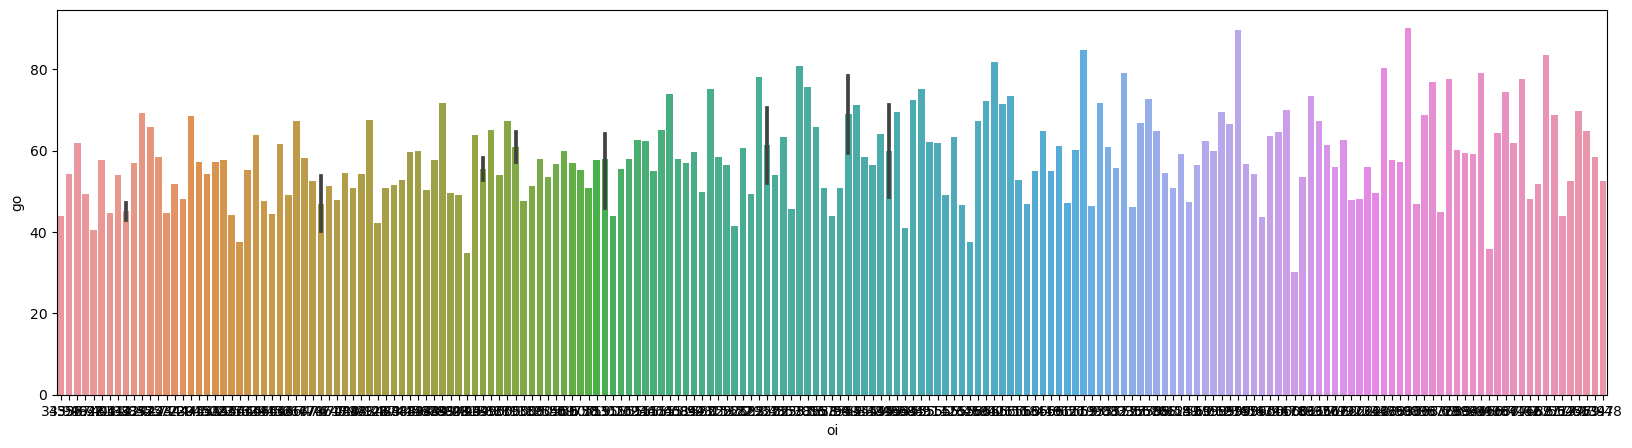

In [17]:
plt.figure(figsize=(20,5))
sns.barplot(data =data, x=data.oi, y=data.go);

ploted eaching-learning resources and Research and Professional Practice with line plot method

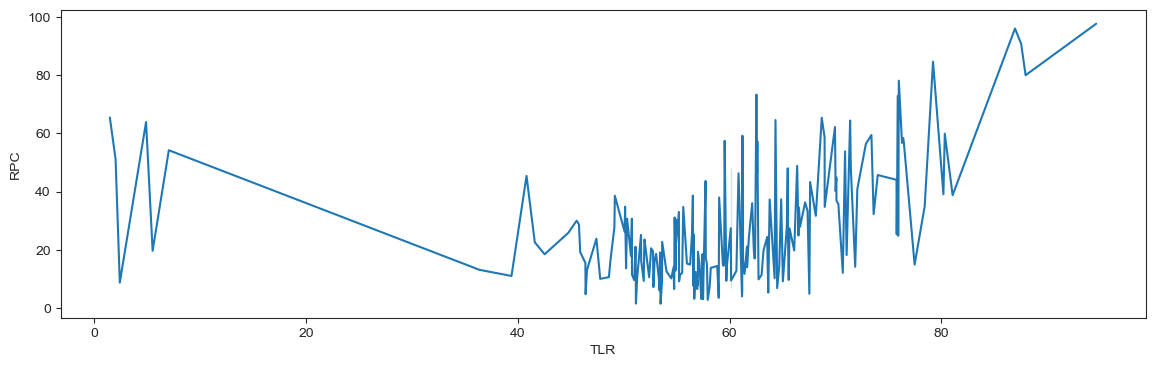

In [56]:
plt.figure(figsize=(14,4),)
sns.lineplot(data = data, x=data.TLR, y=data.RPC);

ploted outreach & inclusivity  and graduation Outcome with line plot method 

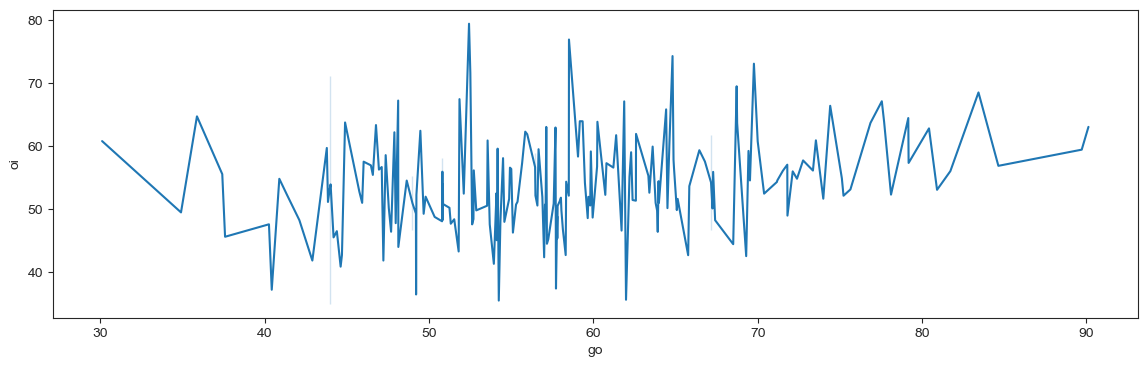

In [55]:
plt.figure(figsize=(14,4))
sns.lineplot(data = data, x=data.go, y=data.oi);

box ploted 

rank

Teaching-learning resources

Research and Professional Practice

graduation Outcome

outreach and inclusivity


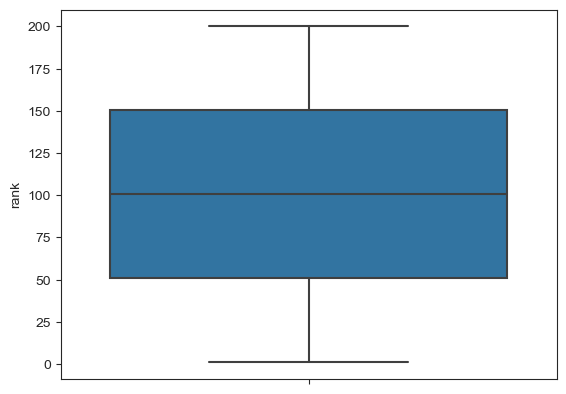

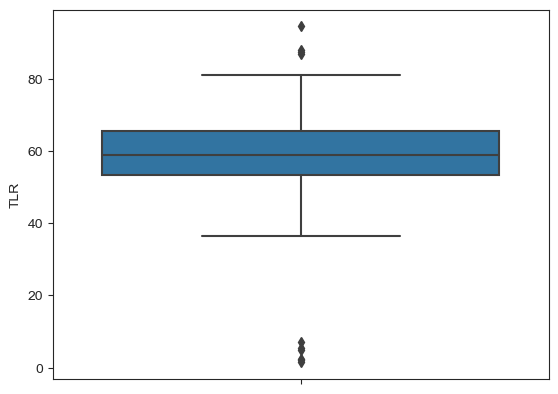

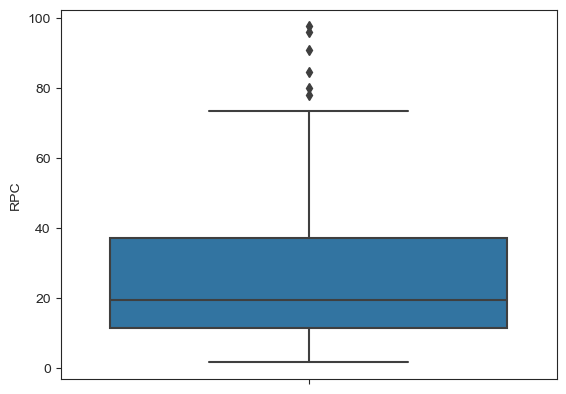

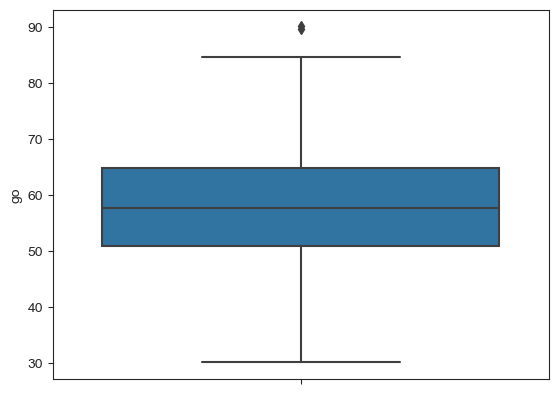

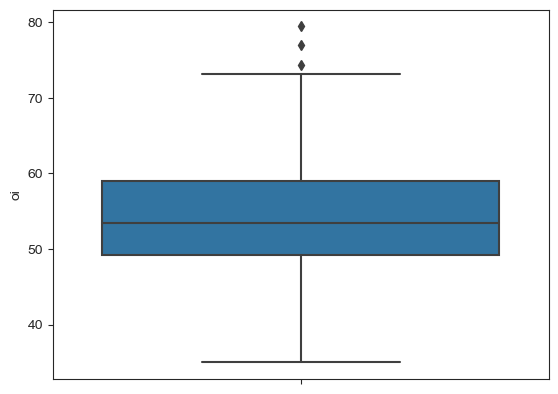

In [59]:
for i in data.columns:
    if data[i].dtype!= "object":
        sns.boxplot(y=data[i])
        plt.show()


hist ploted

rank

Teaching-learning resources

Research and Professional Practice

graduation Outcome

outreach and inclusivity


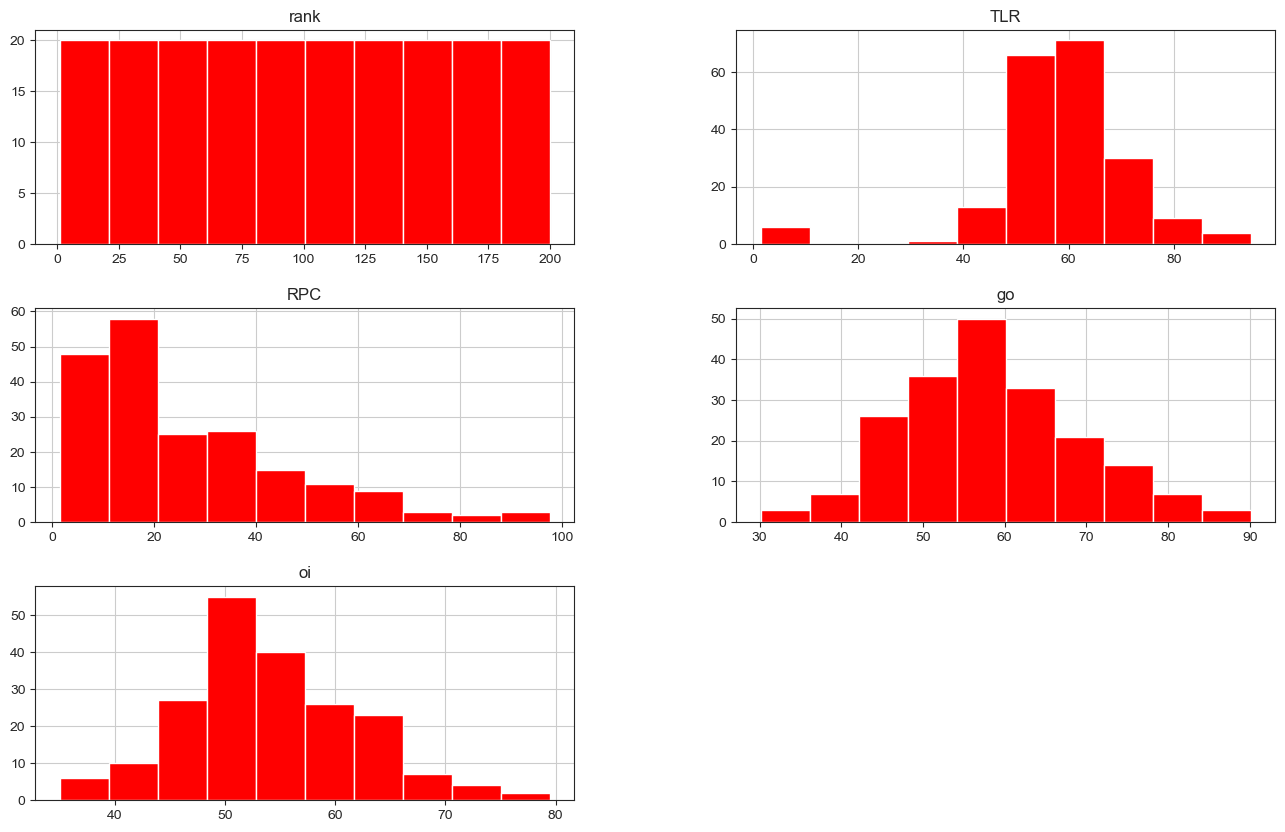

In [48]:
data.hist(figsize=(16,10),color='red');

ratio of ownership

Public/Government and private


In [22]:
grade= data.groupby(['owner_ship'])['TLR'].sum()

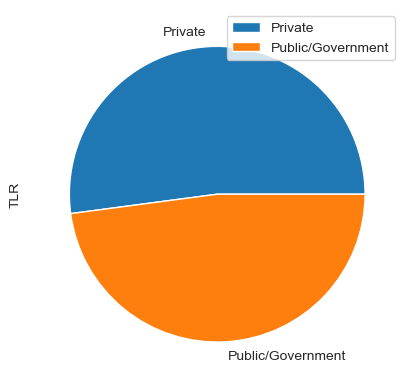

In [23]:
sns.set_style('ticks')
grade.plot.pie()
plt.legend()
plt.show()


factor plot data of ownership withrespect to Teaching-learning resources

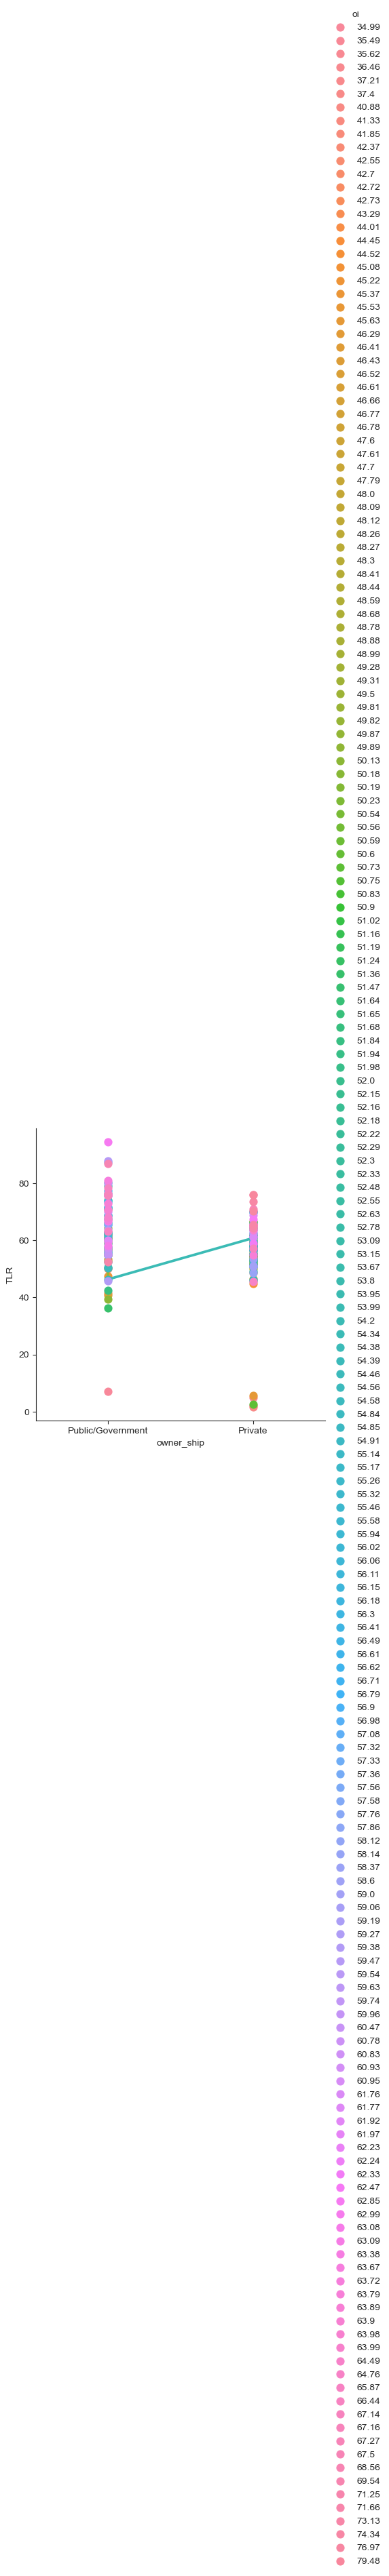

In [24]:
 sns.set_style('ticks')
sns.factorplot('owner_ship','TLR', hue='oi',data=data)
plt.show()

ownership data hoist plotted 

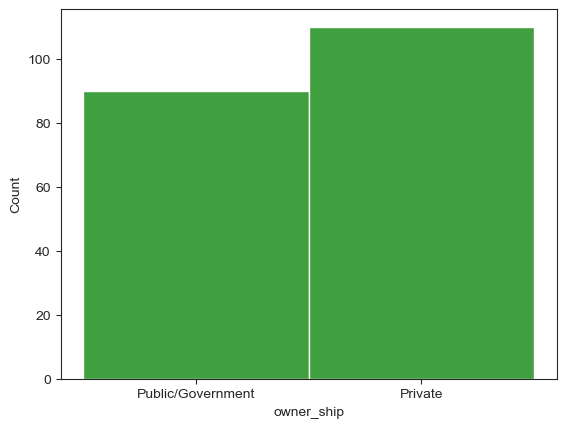

In [25]:
sns.histplot(data.owner_ship,color='green')
plt.show()

hist plot - grade

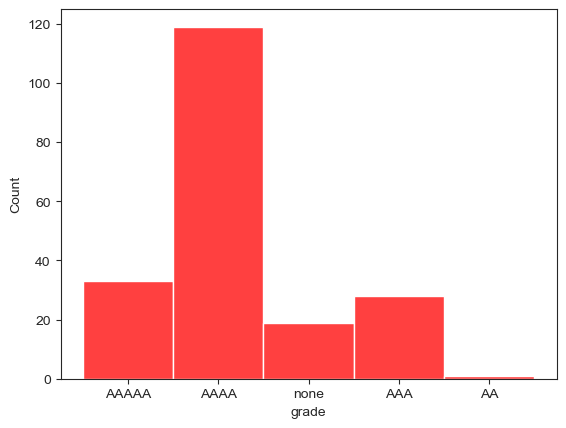

In [42]:
sns.histplot(data.grade,color='red')
plt.show()

hist plot -Teaching-learning resources

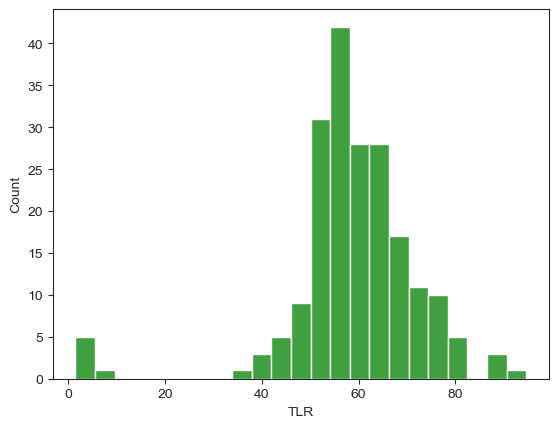

In [27]:
sns.histplot(data.TLR,color='green')
plt.show()

hist plot -Research and Professional Practice

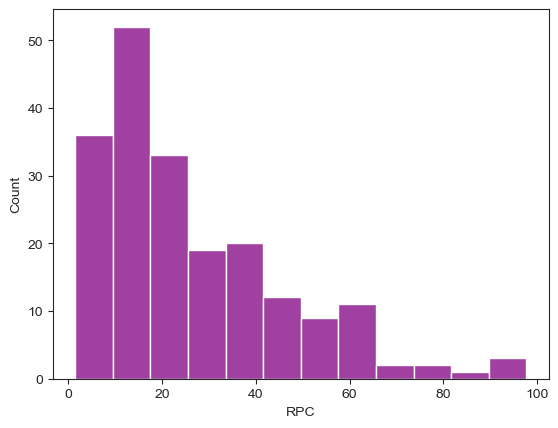

In [43]:
sns.histplot(data.RPC,color='purple')
plt.show()

hist plot -graduation Outcome

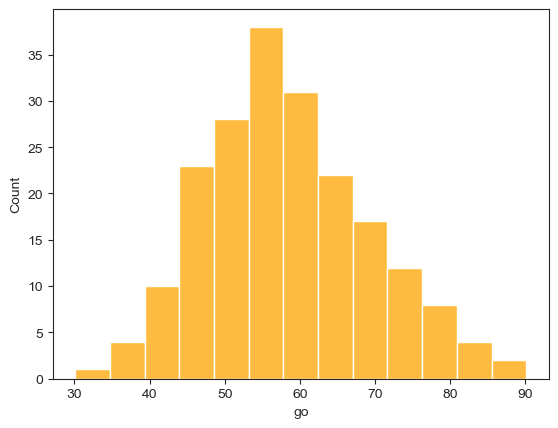

In [45]:
sns.histplot(data.go,color='orange')
plt.show()

hist plot - outreach and inclusivity

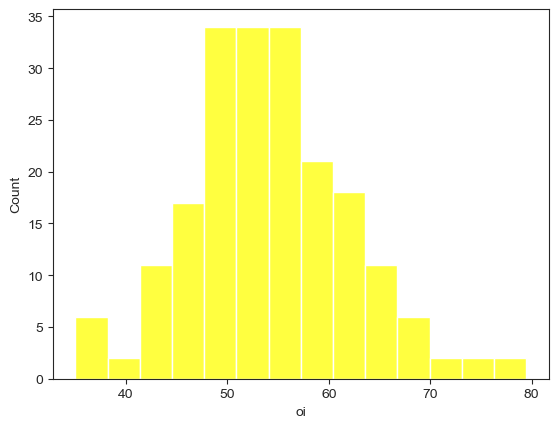

In [46]:
sns.histplot(data.oi,color='yellow')
plt.show()

hist plot - peer perception

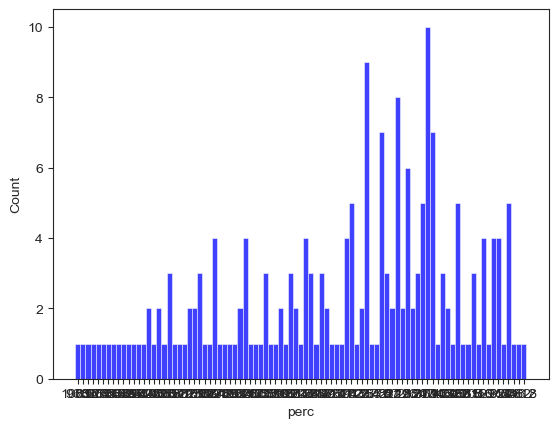

In [47]:
sns.histplot(data.perc,color='blue')
plt.show()

pair plot of data

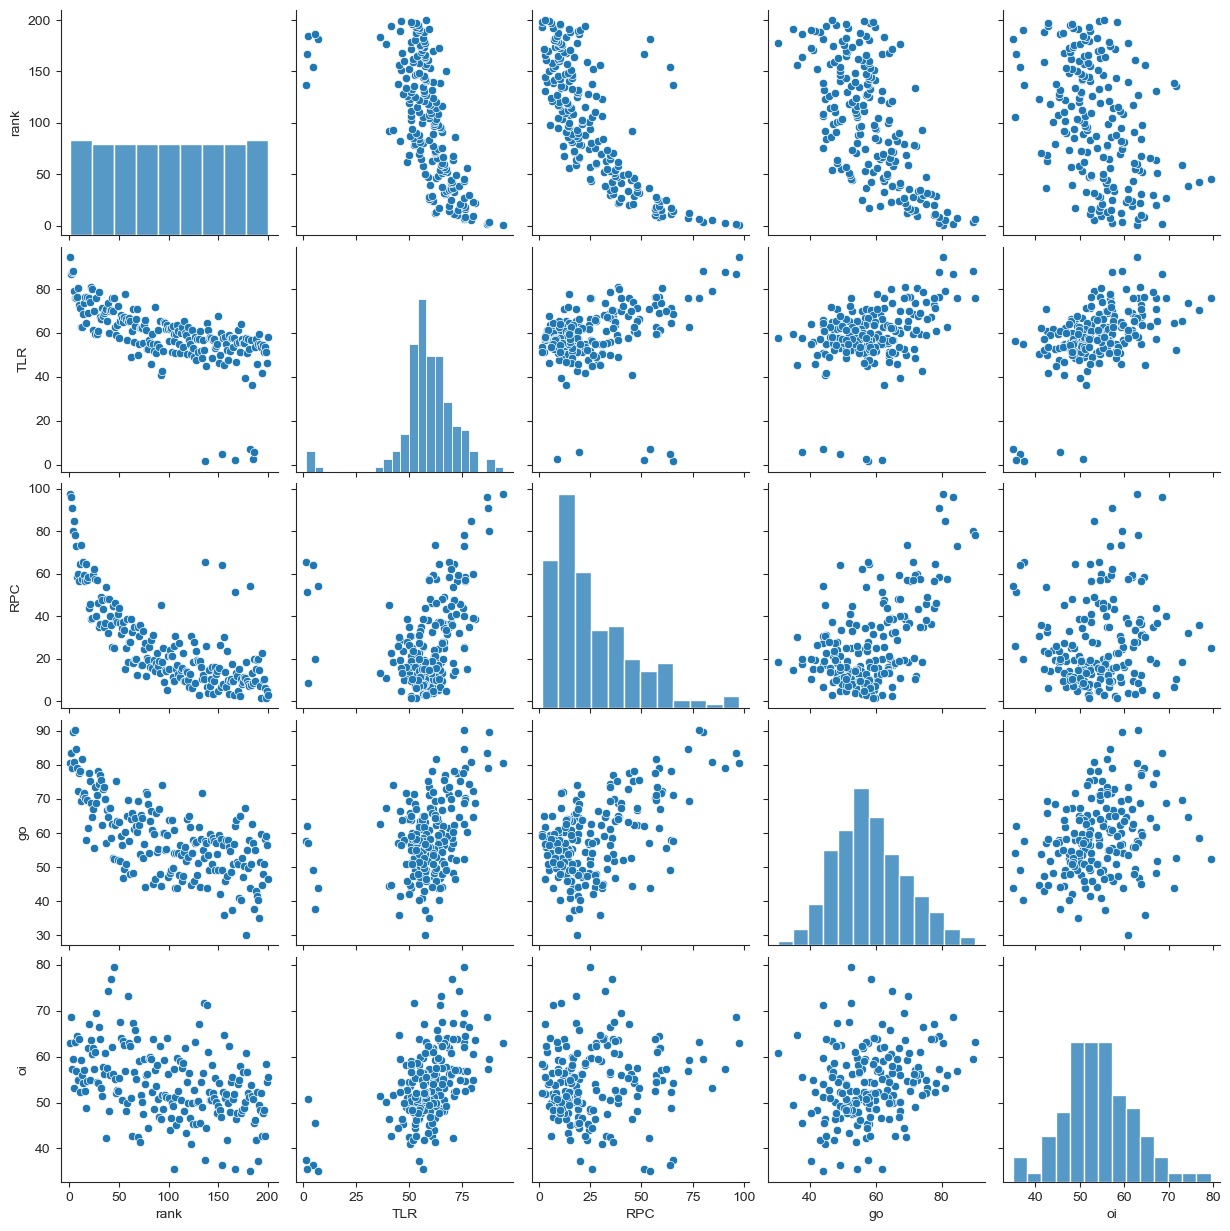

In [34]:
sns.pairplot(data=data)
plt.show()

In [61]:
heat map of data

SyntaxError: invalid syntax (4146310902.py, line 1)

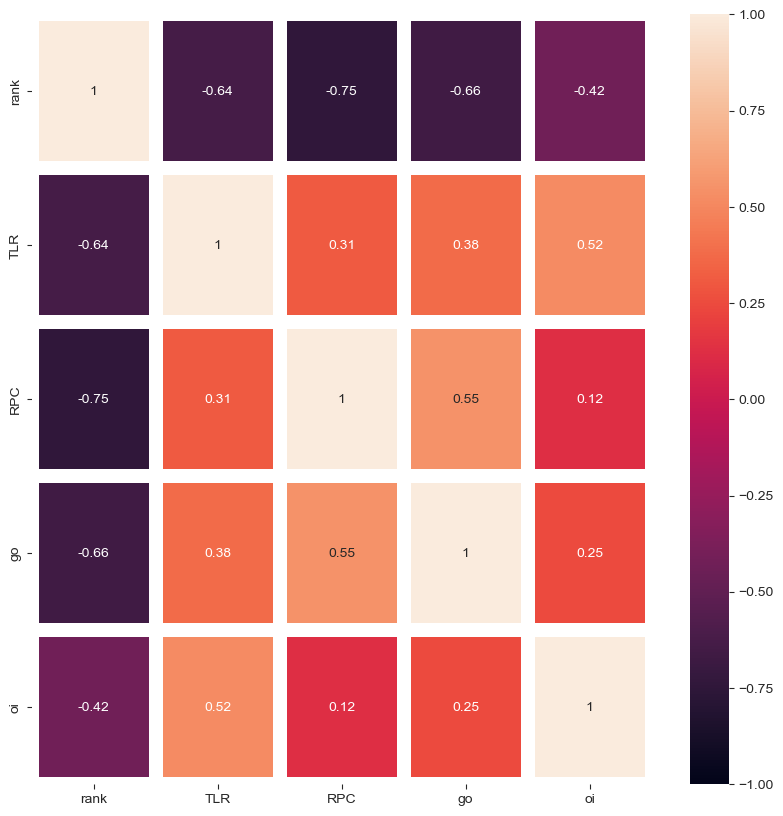

In [38]:
plt.figure(figsize=(10,10))
heat_map=data.corr()
sns.heatmap(heat_map,vmin=-1,vmax=1,annot=True, linewidth=10)
plt.show()


box ploted 

rank

Teaching-learning resources

Research and Professional Practice

graduation Outcome

outreach and inclusivity


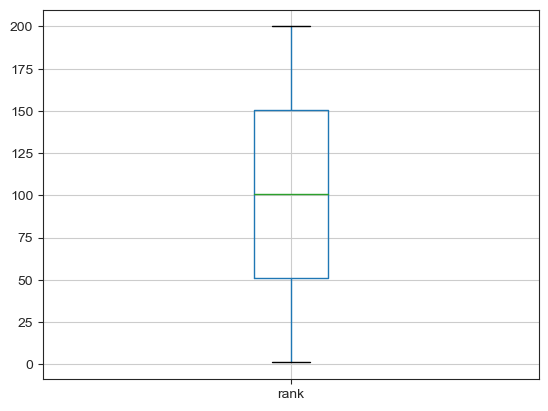

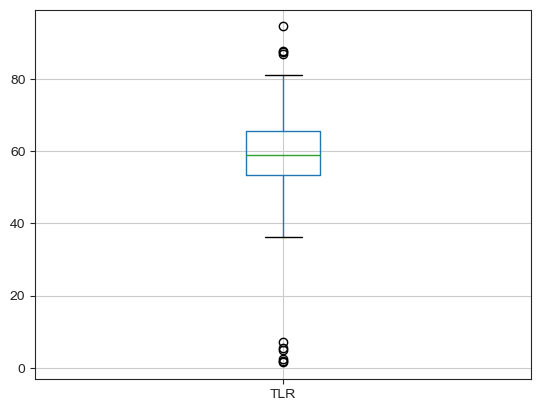

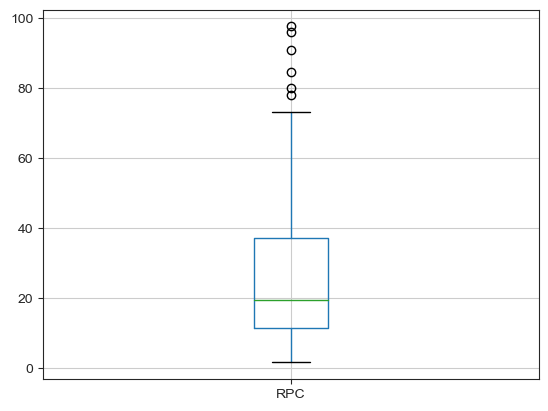

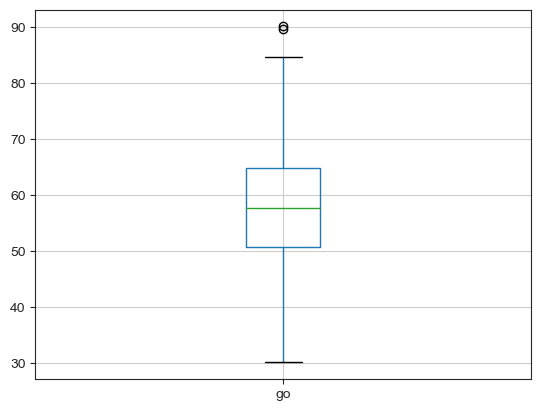

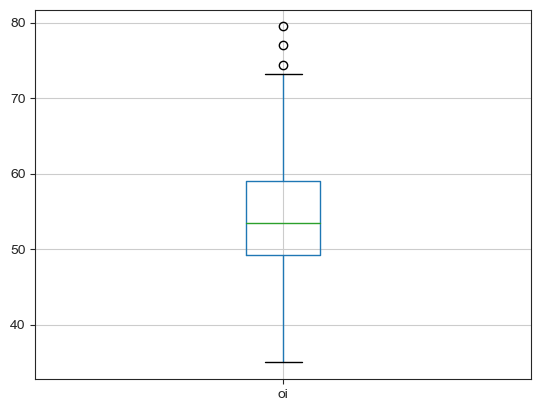

In [41]:
for column in data.columns:
    if data[column].dtype != "object":
        plt.figure()
        data.boxplot([column])
    